In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F


In [3]:
from google.colab import files
uploaded = files.upload()


Saving sub-20252_ses-1_echo-1_part-mag_MEGRE.nii.gz to sub-20252_ses-1_echo-1_part-mag_MEGRE.nii.gz


In [4]:
file_path = list(uploaded.keys())[0]
mri = nib.load(file_path).get_fdata()

print("MRI Shape:", mri.shape)


MRI Shape: (120, 160, 96)


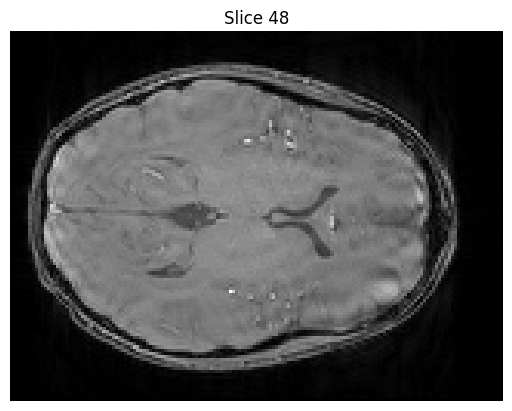

In [5]:
slice_index = mri.shape[2] // 2

plt.imshow(mri[:, :, slice_index], cmap='gray')
plt.title(f"Slice {slice_index}")
plt.axis('off')
plt.show()


In [6]:
slices = [mri[:, :, i] for i in range(mri.shape[2])]
print("Number of slices:", len(slices))


Number of slices: 96


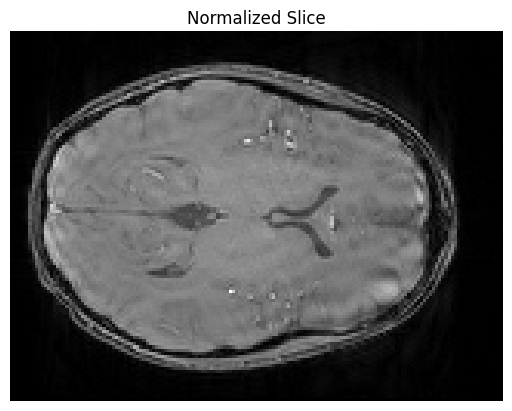

In [7]:
norm_slice = (mri[:, :, slice_index] - np.min(mri)) / (np.max(mri) - np.min(mri))

plt.imshow(norm_slice, cmap='gray')
plt.title("Normalized Slice")
plt.axis('off')
plt.show()


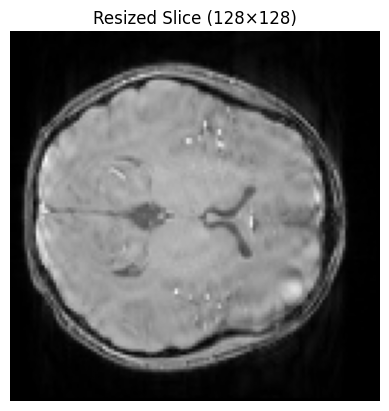

In [8]:
# Convert to torch tensor
slice_tensor = torch.tensor(norm_slice, dtype=torch.float32)

# Add batch and channel dimensions: (1, 1, H, W)
slice_tensor = slice_tensor.unsqueeze(0).unsqueeze(0)

# Resize to 128x128
resized = F.interpolate(slice_tensor, size=(128, 128), mode='bilinear', align_corners=False)

# Remove batch & channel for visualization
resized_img = resized.squeeze().numpy()

plt.imshow(resized_img, cmap='gray')
plt.title("Resized Slice (128×128)")
plt.axis('off')
plt.show()


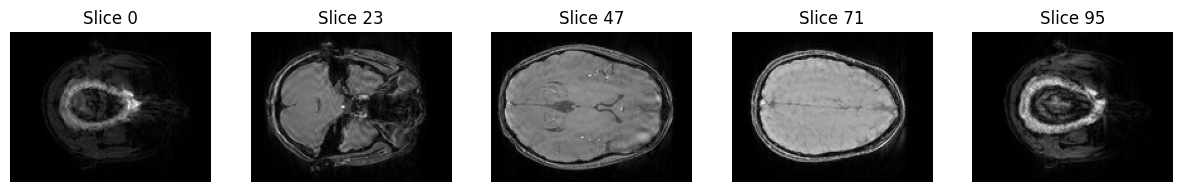

In [9]:
slice_indices = np.linspace(0, mri.shape[2] - 1, 5, dtype=int)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(slice_indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mri[:, :, idx], cmap='gray')
    plt.title(f"Slice {idx}")
    plt.axis('off')

plt.show()


In [10]:
def plot_slices(volume, indices):
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        plt.subplot(1, len(indices), i + 1)
        plt.imshow(volume[:, :, idx], cmap='gray')
        plt.title(f"Slice {idx}")
        plt.axis('off')
    plt.show()


In [11]:
def normalize_volume(volume):
    min_val = np.min(volume)
    max_val = np.max(volume)
    normalized = (volume - min_val) / (max_val - min_val)
    return normalized


In [12]:
normalized_mri = normalize_volume(mri)
print("Normalized MRI shape:", normalized_mri.shape)


Normalized MRI shape: (120, 160, 96)


In [15]:
print("=== VERIFICATION CHECK ===")

# 1. Data checks
print("File is 3D:", len(mri.shape) == 3)
print("MRI shape:", mri.shape)

# 2. Slice checks
slice_index = mri.shape[2] // 2
print("Middle slice index:", slice_index)
print("Slice shape:", mri[:, :, slice_index].shape)

# 3. Normalization checks
norm_slice = (mri[:, :, slice_index] - mri.min()) / (mri.max() - mri.min())
print("Normalized min:", norm_slice.min())
print("Normalized max:", norm_slice.max())

# 4. Resize check (PyTorch)
import torch
import torch.nn.functional as F

slice_tensor = torch.tensor(norm_slice, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
resized = F.interpolate(slice_tensor, size=(128, 128), mode='bilinear', align_corners=False)

print("Resized shape:", resized.shape)

# 5. Slice extraction check
slices = [mri[:, :, i] for i in range(mri.shape[2])]
print("Number of slices extracted:", len(slices))


=== VERIFICATION CHECK ===
File is 3D: True
MRI shape: (120, 160, 96)
Middle slice index: 48
Slice shape: (120, 160)
Normalized min: 0.0
Normalized max: 0.6951530612244898
Resized shape: torch.Size([1, 1, 128, 128])
Number of slices extracted: 96
